In [16]:
from array import array
import math

In [17]:
ichoice = 2

n = 8000
pi = math.pi
lmbda = 1.0
xlow = -48.0*lmbda
dx = 96.0*lmbda/n
k=2.0*pi/lmbda
delta_k = 0.05*k

x = array('d')
y = array('d')
yf = array('d')

sim_integral = 0.0
theory_integral = 0.0

n_waves = 9

for i in range(0,n):
    x.append(xlow+i*dx+.0000001)
    ys = array('d')
    ysum = 0.0
    for j in range(0,n_waves):
        shift = -1.0+j*2.0/(n_waves-1)
        ys.append(math.sin((k-shift*delta_k)*x[i]))
        ysum = ysum + ys[j]

    ytemp = 1.0/n_waves*math.sqrt(delta_k/math.sqrt(2))*ysum
    y.append(ytemp*ytemp)
    
    yf.append(math.sqrt(2.0/(pi*delta_k))*math.sin(k*x[i])*math.sin(delta_k*x[i])/x[i])
    yf[i]=yf[i]*yf[i]
    
    sim_integral += y[i]*dx
    theory_integral += yf[i]*dx
    
ymax = max(y)
ycrit = ymax/2.0

delta_x_theory = 2.0/delta_k

for i in range(n):
    if (y[i] > ycrit):
        xstart = x[i]
        break
for i in range(n-1,0,-1):
    if (y[i] > ycrit):
        xend = x[i]
        break

print(delta_x_theory,xend-xstart)
    
    
print ("Sim integral = %f" % sim_integral)
print ("Theory integral = %f" % theory_integral)


6.366197723675814 7.560000000000002
Sim integral = 0.997459
Theory integral = 0.979569


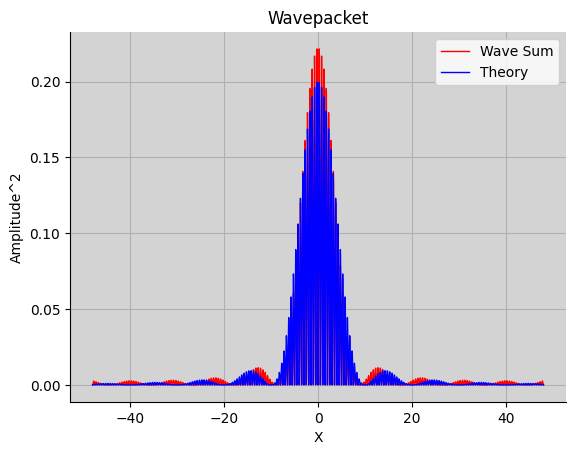

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axes
fig, ax = plt.subplots()

# Set grid lines
ax.grid(True)

# Set frame properties
ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Plot the first graph
ax.plot(x, y, 'r-', linewidth=1, label='Wave Sum')

# Set title and labels for the first graph
ax.set_title('Wavepacket')
ax.set_xlabel('X')
ax.set_ylabel('Amplitude^2')

# Plot the second graph if ichoice > 1
if ichoice > 1:
    ax.plot(x, yf, 'b-', linewidth=1, label='Theory')

# Show the legend
ax.legend()

# Show the plot
plt.show()
